<a href="https://colab.research.google.com/github/YinmiAlas/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np

In [38]:
#calculating the mean without labrary 
#manually
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
total_sales = sum(sales)
mean_total_sale = total_sales / len(sales)
print('Sales Mean :', mean_total_sale)

Sales Mean : 3052.714285714286


In [39]:
#compare the result above with library
np.mean(sales)

3052.714285714286

In [40]:
#calculating the variance without library
#manually by subtracting each score from the mean 
#and then taking square and rolling the sum.
def sales_variance(values):
  variance = 0

  for values1 in values:

    variance = variance + (mean_total_sale - values1) ** 2

  return variance / len(values)

print('Variance of Sales:', sales_variance(sales))


Variance of Sales: 183761.06122448976


In [41]:
#comparing the result above with library
np.var(sales)

183761.06122448976

In [42]:
#calculating the standar deviation without library
#manually by taking square root of the variance
def sales_std_deviation(variance):
  return variance ** 0.5 

variance = sales_variance(sales)

print('Stasndar Deviation of Sales :', sales_std_deviation(variance))

Stasndar Deviation of Sales : 428.67360686714756


In [43]:
#comparing the result above with library
np.std(sales)

428.67360686714756

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
sales1 = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])
customer_last_week = np.array([127, 80, 105, 92, 120, 115, 93])

In [11]:
#calculatying the covariance with numpy
def covariance(value, value1):
  return np.cov(value, value1)
print('The Covariance :', '{:.2f}'.format(covariance(sales1, customer_last_week)[0][1]))

The Covariance : 7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
import pandas as pd

In [32]:
df = pd.DataFrame({'sales1':sales1, 'customer_last_week':customer_last_week})
df

,sales1,customer_last_week
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [46]:
#the standard deviation of customers who entered the store last week and sale last week
#the standar deviation is bigger than the above using numpy because the ddof is 1 just population
#above the ddof is 0 the whole list
sa_std = df['sales1'].std(ddof=1)
cu_std = df['customer_last_week'].std(ddof=1)
print(sa_std)
print(cu_std)

463.0204150595357
17.057326313123664


In [47]:
#covariance of both
cov_sa_cu = df['sales1'].cov(df['customer_last_week'])
cov_sa_cu

7604.357142857142

In [0]:
deter = sa_std * cu_std

In [49]:
#calculate correlation of both
corr_sc = cov_sa_cu / deter
corr_sc

0.9628339778148909

In [51]:
#comparing correlation of both in DataFrame
df.corr()

,sales1,customer_last_week
sales1,1.000000,0.962834
customer_last_week,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [57]:
titanic = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv', index_col=0)
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1


In [61]:
titanic.cov().head(8)

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [62]:
titanic.corr().head(8)

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt

In [66]:
#this vectors are orthogonal to each other because is 0
v1 = [0,4]
v2 = [5,0]
np.dot(v1, v2)

0

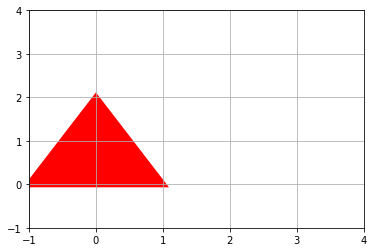

In [76]:
fig, axes = plt.subplots()
axes.grid()
plt.xlim(-1,4)
plt.ylim(-1,4)

plt.arrow(0,0, v1[0], v2[1], head_width=2, head_length=2, linewidth=6, color='red' )
plt.show()

#What is a synonym for orthogonal?
#- Perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [77]:
#Are the following vectors orthogonal? Why or why not?
'''Not because the DOT product has to be zero '''
a = [-5,3,7]
b = [6,-8,2]
np.dot(a, b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
import math

In [89]:
#What is  ||𝑐||2 ?
c = np.array([2,-15,6,20])
np.linalg.norm(c)

25.787593916455254

In [84]:
#What is  𝑐⋅𝑐 ?
np.dot(c,c)

665

In [88]:
#What is  𝑐𝑇𝑐 ?
pd.DataFrame(c)

,0,1
0,2,-15
1,6,20


In [87]:
#What is  𝑐𝑇𝑐 ?
c = np.array([[2,-15],[6,20]])
pd.DataFrame(c.T)


,0,1
0,2,6
1,-15,20


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$for d:


$$\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\beging{bmatrix} 1 \\ 0 
\end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 
12\hat{j}
\end{align}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [93]:
#the hat symbol (f^) indicates it's a unit vector
f = [4,12,11,9,2]
f_hat = f/np.linalg.norm(f)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

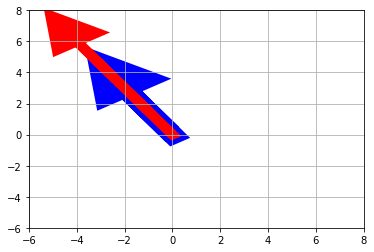

In [29]:
vect = [-4, 6, 8]
vector = [-2, 3, 5]

fig , axis = plt.subplots()
axis.grid()
plt.xlim(-6,8)
plt.ylim(-6,8)

plt.arrow(0,0, vector[0], vector[1], head_width=2, head_length=2, linewidth=20, color='blue')
plt.arrow(0,0, vect[0], vect[1], head_width=2, head_length=2, linewidth=10, color='red')

plt.show()

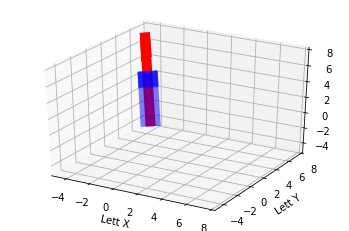

In [29]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')

axes.quiver(0,0,0, vector[0], vector[1], vector[2], length=1, color='blue', linewidth=20, alpha=0.5)
axes.quiver(0,0,0, vect[0], vect[1], vect[2], length=1, color='red', linewidth=10)


axes.set_xlim([-5,8])
axes.set_ylim([-5,8])
axes.set_zlim([-5,8])
axes.set_xlabel('Lett X')
axes.set_ylabel('Lett Y')

plt.show()

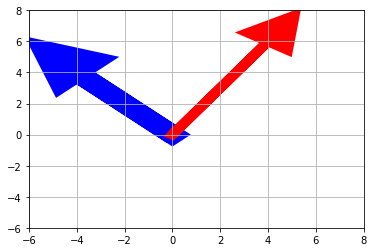

In [3]:
vect1 = [4,6]
vector1 = [-4,4]

fig, axis = plt.subplots()
axis.grid()
plt.xlim(-6,8)
plt.ylim(-6,8)

plt.arrow(0,0, vector1[0], vector1[1], head_width=2, head_length=2, linewidth=20, color='blue')
plt.arrow(0,0, vect1[0], vect1[1], head_width=2, head_length=2, linewidth=10, color='red')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [3]:
g = [1,2]
h = [4,8]
a,b = (4,5)
span_g_h = np.multiply(g, a) + np.multiply(h, b)
print(span)

[24 48]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [4]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]
c,d,e = (2,7,4)
span_l_m_n = np.multiply(l, c) + np.multiply(m, d) + np.multiply(n, e)
print(span_l_m_n)

[11 36 63]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



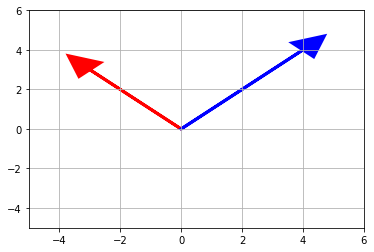

In [15]:
vect = [-3,3]
vect1 = [4,4]

fig, axes = plt.subplots()
axes.grid()
plt.xlim(-5,6)
plt.ylim(-5,6)

plt.arrow(0,0, vect[0], vect[1], head_width=1, head_length=1, linewidth=3, color='red')
plt.arrow(0,0, vect1[0], vect1[1], head_width=1, head_length=1, linewidth=3, color='blue')
plt.show()

## 6.2 What does it mean to form a basis?

The basis of 2 dimensional vector

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [18]:
p = np.array([[1,2,3], [-1,0,7], [4,8,2]])
np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

the dimension of P is 3x3 and it has 3 vectors

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v = [1,3]
w = [-1,2]
w_dot_v = np.dot(v, w)
v_dot_v = np.dot(v, v)

In [4]:
frac = w_dot_v/v_dot_v
linear_projection = np.multiply(frac, v)
print(linear_projection)

[0.5 1.5]


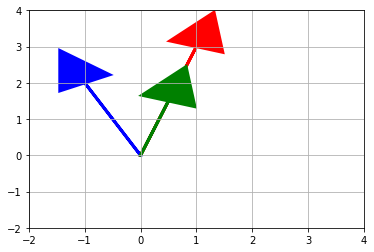

In [9]:
fig, axes = plt.subplots()
axes.grid()

plt.xlim(-2.0,4.0)
plt.ylim(-2.0,4.0)

plt.arrow(0,0, v[0], v[1], head_width=1, head_length=1, linewidth=3, color='red')
plt.arrow(0,0, w[0], w[1], head_width=1, head_length=1, linewidth=3, color='blue')
plt.arrow(0,0, linear_projection[0], linear_projection[1], head_width=1, head_length=1, linewidth=3, color='green')

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

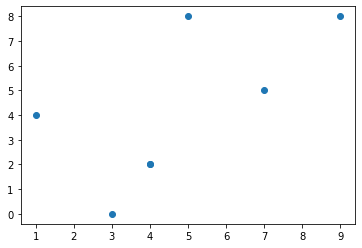

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()